Paolo Toneguzzo


---



#Project 4: Insurance Policy Cross-Selling

## 1. Importing the dataset and first exploration
>The aim of the following commands is uploading the dataset and obtaining preliminary information, such as dataset shape and a first examination of contents.

In [2]:
import pandas as pd

In [23]:
df = pd.read_csv("/content/drive/MyDrive/insurance_cross_sell.csv", index_col = 0) # Important to remember than from now on the indexinng starts from 1
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
df.tail()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


In [5]:
df.shape

(381109, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 381109 entries, 1 to 381109
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 34.9+ MB


>The dataset describing behavioral preferences in the insurance policy field contains **381,109 instances** and **11 features**, summarized below along with their variable types:

>1) Gender: Gender of the client - qualitative nominal variable.

>2) Age: Age of the client - quantitative discrete variable.

>3) Driving License: Ownership of a driving license - qualitative nominal variable, numerically encoded.

>4) Region Code: Unambiguous code indicating the region where the client resides - qualitative nominal variable, numerically encoded.

>5) Previously Insured: Indicates whether the client’s vehicle was previously insured (“1” for yes, “0” for no) - qualitative nominal variable, numerically encoded.

>6) Vehicle Age: Age category of the client’s vehicle - quantitative descrete variable.

>7) Vehicle Damage: Indicates whether the client’s vehicle has sustained damage in the past - qualitative nominal variable.

>8) Annual Premium: Annual amount paid by the client for the insurance policy - quantitative continuous variable on a ratio scale.

>9) Policy Sales Channel: Communication channel used to contact the client during sales - qualitative nominal variable, numerically encoded.

>10) Vintage: Number of days since the client signed the policy contract - quantitative discrete variable.

>11) Response: Client’s response to the cross-selling offer (“1” for positive, “0” for negative) - qualitative nominal variable, numerically encoded.

>It is worth noting that none of the features contain null values. Therefore, data imputation procedures such as removing rows or substituting missing values with representative statistics (e.g., mean, median, or mode) were not required.

## 2. Dataset preprocessing and further explorative analysis

>In this module, the features will be encoded and their distributions thoroughly assessed to identify hidden or non-intuitive patterns and relationships between variables.

In [10]:
df.shape

(381109, 11)

>The pre-processing of features is the next step. This operation is crucial to ensure the algorithm can access the information present in the dataframe. In practical terms, to guarantee the variance encoded by the features to be accounted by the model, it is necessary to convert all the qualitative variables into numbers. There are several ways to deal with this process according to the features type. The Feature Encoding is performed now aiming at executing a preliminary, expolartive analysis of the data. Upon model building, the dataset utilized will be the non-encoded one. A single-feature case examination will be carried out:

>>2.1. **Gender** : variable that specifies the gender of the clients in "Male" or "Female", can be easily converted into "1" or "0" respectively. This operation is called *Label Encoding:*

In [7]:
import numpy as np

In [8]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,1,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,1,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,1,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
4,1,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
5,0,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


>>2.2. **Age**, **Driving License**, **Previously Insured**, **Annual Premium**, and **Response**: they do not require any further feature pre-processing being them either quantitative variables or having already been converted into numerically encoded ones.

>>2.3. **Regional Code** : it represents the clients residing area. Some exploration of the feature is beneficial to understand how to handle it during the upcoming interactions:

In [25]:
RC_val = df["Region_Code"].unique()
RC_val

array([28.,  3., 11., 41., 33.,  6., 35., 50., 15., 45.,  8., 36., 30.,
       26., 16., 47., 48., 19., 39., 23., 37.,  5., 17.,  2.,  7., 29.,
       46., 27., 25., 13., 18., 20., 49., 22., 44.,  0.,  9., 31., 12.,
       34., 21., 10., 14., 38., 24., 40., 43., 32.,  4., 51., 42.,  1.,
       52.])

In [26]:
np.sort(RC_val)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52.])

>>**Regional Code** has already been *ordinally encoded,* hence no further processing is required.

>>2.4. **Vehicle Age** : it describes the vehicle age adopting three categories, such as "1-2 Year", "< 1 Year", "> 2 Years". These are ordinal categories, thus translatable into quantitative information via *Ordinal Encoding* :

In [27]:
VA = df["Vehicle_Age"].value_counts()
VA

,count
Vehicle_Age,
1-2 Year,200316
< 1 Year,164786
> 2 Years,16007


In [28]:
va_mapping={"< 1 Year":1,"1-2 Year":2, "> 2 Years":3}
df["Vehicle_Age"] = df["Vehicle_Age"].map(lambda t:va_mapping[t])

In [29]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,1,44,1,28.0,0,3,Yes,40454.0,26.0,217,1
2,1,76,1,3.0,0,2,No,33536.0,26.0,183,0
3,1,47,1,28.0,0,3,Yes,38294.0,26.0,27,1
4,1,21,1,11.0,1,1,No,28619.0,152.0,203,0
5,0,29,1,41.0,1,1,No,27496.0,152.0,39,0


In [30]:
df['Vehicle_Age'].value_counts()

,count
Vehicle_Age,
2,200316
1,164786
3,16007


>>2.5. **Vehicle Damage** : it needs to be processed through *Label Encoding* turning "Yes" into "1" and "No" into "0":

In [31]:
df['Vehicle_Damage'] = le.fit_transform(df['Vehicle_Damage'])
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,1,44,1,28.0,0,3,1,40454.0,26.0,217,1
2,1,76,1,3.0,0,2,0,33536.0,26.0,183,0
3,1,47,1,28.0,0,3,1,38294.0,26.0,27,1
4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


>>2.6. **Policy Sales Channel** : apparently, it might be misjudged for a qualitative ordinal varible. Let's examine the feature's categories:

In [32]:
PSC_val = df['Policy_Sales_Channel'].unique()
PSC_val

array([ 26., 152., 160., 124.,  14.,  13.,  30., 156., 163., 157., 122.,
        19.,  22.,  15., 154.,  16.,  52., 155.,  11., 151., 125.,  25.,
        61.,   1.,  86.,  31., 150.,  23.,  60.,  21., 121.,   3., 139.,
        12.,  29.,  55.,   7.,  47., 127., 153.,  78., 158.,  89.,  32.,
         8.,  10., 120.,  65.,   4.,  42.,  83., 136.,  24.,  18.,  56.,
        48., 106.,  54.,  93., 116.,  91.,  45.,   9., 145., 147.,  44.,
       109.,  37., 140., 107., 128., 131., 114., 118., 159., 119., 105.,
       135.,  62., 138., 129.,  88.,  92., 111., 113.,  73.,  36.,  28.,
        35.,  59.,  53., 148., 133., 108.,  64.,  39.,  94., 132.,  46.,
        81., 103.,  90.,  51.,  27., 146.,  63.,  96.,  40.,  66., 100.,
        95., 123.,  98.,  75.,  69., 130., 134.,  49.,  97.,  38.,  17.,
       110.,  80.,  71., 117.,  58.,  20.,  76., 104.,  87.,  84., 137.,
       126.,  68.,  67., 101., 115.,  57.,  82.,  79., 112.,  99.,  70.,
         2.,  34.,  33.,  74., 102., 149.,  43.,   

In [33]:
PSC_val.shape

(155,)

In [34]:
np.sort(PSC_val)

array([  1.,   2.,   3.,   4.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,
        13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,
        24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,
        35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,
        46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,
        57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,
        68.,  69.,  70.,  71.,  73.,  74.,  75.,  76.,  78.,  79.,  80.,
        81.,  82.,  83.,  84.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,
        93.,  94.,  95.,  96.,  97.,  98.,  99., 100., 101., 102., 103.,
       104., 105., 106., 107., 108., 109., 110., 111., 112., 113., 114.,
       115., 116., 117., 118., 119., 120., 121., 122., 123., 124., 125.,
       126., 127., 128., 129., 130., 131., 132., 133., 134., 135., 136.,
       137., 138., 139., 140., 143., 144., 145., 146., 147., 148., 149.,
       150., 151., 152., 153., 154., 155., 156., 15

In [35]:
df['Policy_Sales_Channel'].value_counts()

,count
Policy_Sales_Channel,
152.0,134784
26.0,79700
124.0,73995
160.0,21779
156.0,10661
...,...
149.0,1
43.0,1
144.0,1


>>From a quick exploration of **Policy Sales Channel** turns out that the sale modality is encoded in one of 155 integers numbers. These numbers are not spanning from 0 to 154 but from 1 to 163, with some integeres missing. In spite of that, the varible is already under ordinal encoding therefore no further processing is required.



>>2.7. **Response** : The goal of this project is to build a Machine Learning Classification model that allows to  predict the client's response to the cross-selling policy offer. Let's have a first look at the Dependent variable distribution.

In [36]:
RS = df['Response'].value_counts()
print(f"The clients that have POSITIVELY RESPONDED to the cross-policy offer are {RS[1]}, ({(RS[1]/(RS[0]+RS[1]))*100:.2f}%).")
print(f"The clients that have NEGATIVELY RESPONDED to the cross-policy offer are {RS[0]}, ({(RS[0]/(RS[0]+RS[1]))*100:.2f}%).")

The clients that have POSITIVELY RESPONDED to the cross-policy offer are 46710, (12.26%).
The clients that have NEGATIVELY RESPONDED to the cross-policy offer are 334399, (87.74%).


>>The **response** distribution leans heavily on the NEGATIVE RESPONDERS side with 87.74 % of them NOT having accepted the cross-selling offer. This different distribution between class categories will have to be accounted for in future steps of the analysis.

* standardiation is done on the features not on the dataset. Does it need to be done on info use for prediction as well?
* Features encoding shouldm be performed within the CV loop. Anyways some features were already converted and I chose to pre-process the others as well. Important to mention that the encoding before cross-validting should not increase the model perfomances but only decrease them -> anyways, it would be more polished to emcompass the step within the CV loop and transform only the training set
* Precision might be the best target for ROC x axis IF WEIGHTS ARE UNBALANCED?
* feature extraction/construction (e.g., using dimensionality reduction techniques), preprocessing (e.g., missing value imputation, standardization), feature selection, and model training.

>>2.8. <font color = "red"> **Features relationships** :To better understand relationships between features, the *Correlation Matrix* comes as a helpful instrument. By leaveraging the *Pearson's correlation coefficient* between dyads of variables, it provides insights on their relationships. This step is usually adopted during *Feature Selection* procedure for understanding the relevance of features in predicting the outcome varible. However, in this specific case, *Feature Selection* process is not going to be performed at this early stage of the project, given that selecting and/or encoding fetaures before *Cross-Validation* will inevitably lead to *Data Leakage*. Indeed, encoding features before splitting upon cross-validation might leave residual knowledge of the encoded variables even when these are not present in that specific training batch. Moreover, deleting certain features before splitting can lead to biased, un-generalizable reuslts. </font>

In [38]:
import seaborn as sns
from matplotlib import pyplot as plt

>> For the sake of completessness, hereafter are displayed the *Correlation Matricies* adopting Spearman's rho and Kendall's tau. I reasoned that, due to the strong presence of categorical features, other metrics than Pearson's r would have been more adeqaute for poundering the relationships between these variables. As shown below, using other correlation metrics produced very similar results.

In [82]:
#plt.figure(figsize = (20,18))
#sns.heatmap(df.corr('kendall'), annot = True, annot_kws = {'size':18})

>> <font color = "red">The **Response** variable shows modest degrees of correlation with **Previously Insured, (r:-0.34)**, and **Vehicle Damage, (r:0.35)** considering a cut-off of 0.25 (Where does this coìutt-off come from??--> delve into that). Moreover, there is a negative correlation of **Vehicle Damage** and **Vehicle Age** with **Previously Insured**, characterized by a strong and a more contained relationship (r:-0.82,-0.38), respictively.</font>

>>>2.8.1. **Driving License** :

In [282]:
class categ_explo():
  ''' This class helps exploring the relationships between categorical features'''

  def __init__(self,feature):
    '''This method defines the values of the class'''
    self._feature = feature


  def freq_table(self):
    freq_table = pd.crosstab(df['Response'], self._feature)
    return freq_table


  def feat_name(self):
    replaced_name = None
    if "_" in self._feature.name:
      replaced_name = self._feature.name.replace("_", " ")
    else:
      replaced_name = self._feature.name
    return replaced_name


  def tick_set(self):
    tick_set_list = []

    if len(self._feature.unique()) == 2:
      a = str(input("Insert the label for the firstly encoded category"))
      tick_set_list.append(a)
      b = str(input("Insert the label for the secondly encoded category"))
      tick_set_list.append(b)

    elif len(self._feature.unique()) > 2:
      for i in range(len(self._feature.unique())):
        tick_set_list.insert(i,range(len(self._feature.unique()))[i])
    return tick_set_list


    def percent(self):

      ft = self._freq_table().values

      for i in range(len(self._feature.unique())):
        print(f"The clients that have positively responded to the Cross-selling, belonging to the {range(len(self._feature.unique()))[i]} class of {self._feat_name()} are {freq_table[1,i]},({(freq_table[1,i]/(freq_table[1,i]+freq_table[0,i]))*100:.2f}%).")


In [284]:
FINISH TO ESTABLISH THE CLASS

SyntaxError: invalid syntax (ipython-input-611545036.py, line 1)

In [283]:
Pao1.percent()

AttributeError: 'categ_explo' object has no attribute 'percent'

In [240]:
def qual_feature_expl(feature):

  freq_table = pd.crosstab(df['Response'], feature)

  if "_" in feature.name:
    feature.name = feature.name.replace("_", " ")

  tick_set = []
  if len(feature.unique()) == 2:
    a = str(input("Insert the label for the firstly encoded category"))
    tick_set.append(a)
    b = str(input("Insert the label for the secondly encoded category"))
    tick_set.append(b)

  elif len(feature.unique()) > 2:
    for i in range(len(feature.unique())):
      tick_set.insert(i,range(len(feature.unique()))[i])

  plt.figure(figsize=(12, 4))

  plt.subplot(1,2,1)
  img = sns.heatmap(freq_table, annot = True, fmt='g',cbar = False)
  img.set_title(f"Heatmaprepresentation of {feature.name} classes \n in Cross-selling Policy Response", pad = 20)
  img.set_xlabel(f"{feature.name}", labelpad = 14)
  img.set_ylabel("Responce to Cross-selling Policy",labelpad = 14)
  img.set_yticklabels(['No', 'Yes'])
  img.set_xticklabels(tick_set)

  plt.subplot(1,2,2)
  freq_table = freq_table.values
  l = []
  for i in feature.unique():
    l.append(str(i))

  weight_counts = {"Yes": freq_table[1,:], "No": freq_table[0,:]}
  width = 0.4
  bottom = np.zeros(len(feature.unique()))

  for keys, values in weight_counts.items():
    a = plt.bar(l, values, width, bottom = bottom)
    bottom += values
    plt.bar_label(a,label_type='edge')

  plt.xticks(l, tick_set , fontsize=12)
  plt.title(f"Bar Chart representation of {feature.name} classes \n in Cross-selling Policy Response", pad = 20)
  plt.xlabel(f"{feature.name}", labelpad = 14)
  plt.ylabel("Response (counts)")
  plt.legend(["Positively Responded", "Negatively Responded"], loc = "upper center")
  plt.subplots_adjust(wspace= 0.5)

In [259]:
def percent(feature):
  freq_table = pd.crosstab(df['Response'], feature)
  freq_table = freq_table.values

  if "_" in feature.name:
    feature.name = feature.name.replace("_", " ")


  for i in range(len(feature.unique())):
    print(f"The clients that have positively responded, having the {range(len(feature.unique()))[i]} class of {feature.name} are {freq_table[1,i]},({(freq_table[1,i]/(freq_table[1,i]+freq_table[0,i]))*100:.2f}%).")

In [ ]:
tick_set = []
  if len(feature.unique()) == 2:
    a = str(input("Insert the label for the firstly encoded category"))
    tick_set.append(a)
    print(f"The clients that have positively responded among {a} class of {feature.name} are {freq_table[1,0]},({(freq_table[1,0]/(freq_table[1,0]+freq_table[0,0]))*100:.2f}%).")

    b = str(input("Insert the label for the secondly encoded category"))
    tick_set.append(b)
    print(f"The clients that have positively responded among the {b} class of {feature.name} are {freq_table[1,1]}, ({(freq_table[1,1]/(freq_table[1,1]+freq_table[0,1]))*100:.2f}%).")

  elif len(feature.unique()) > 2:

Insert the label for the firstly encoded categoryno
Insert the label for the secondly encoded categoryyes


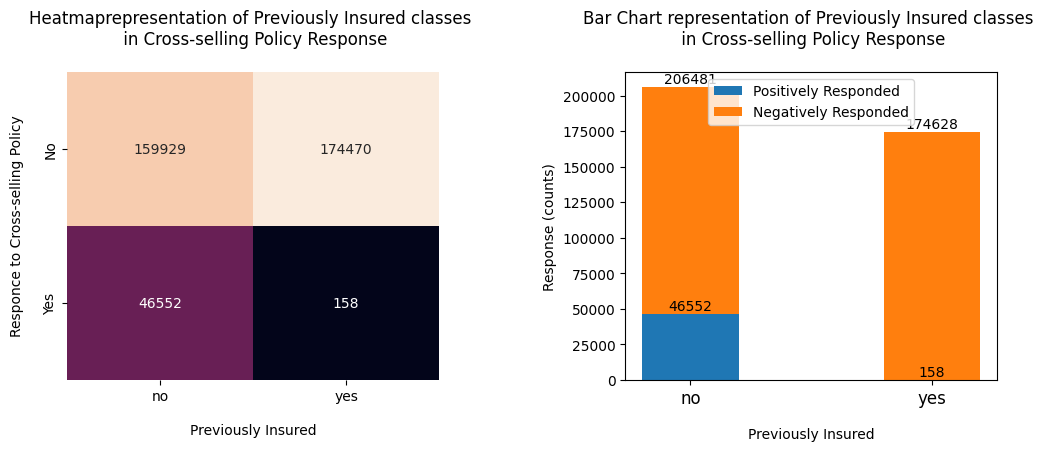

In [241]:
qual_feature_expl(df['Previously_Insured'])

In [260]:
percent(df['Previously_Insured'])

The clients that have positively responded, having the 0 class of Previously Insured are 46552,(22.55%).
The clients that have positively responded, having the 1 class of Previously Insured are 158,(0.09%).


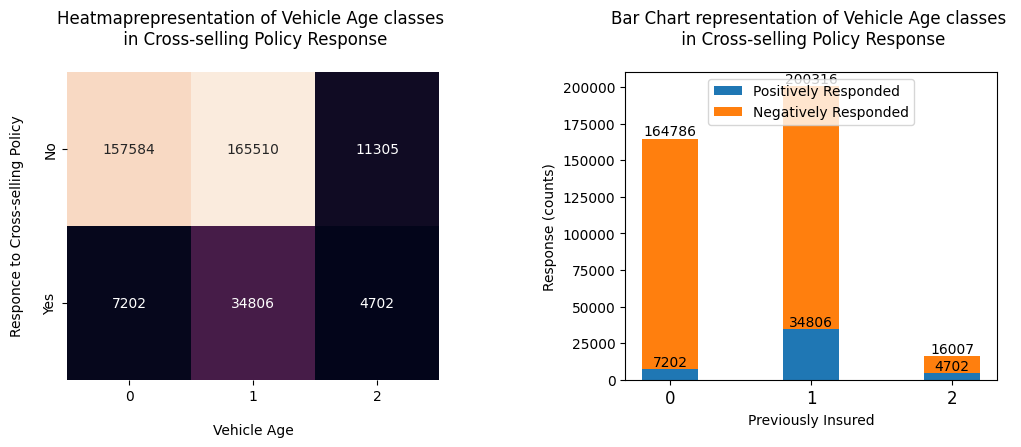

In [234]:
qual_feature_expl(df['Vehicle_Age'])

Insert the label for the firstly encoded categoryno
Insert the label for the secondly encoded categoryyes


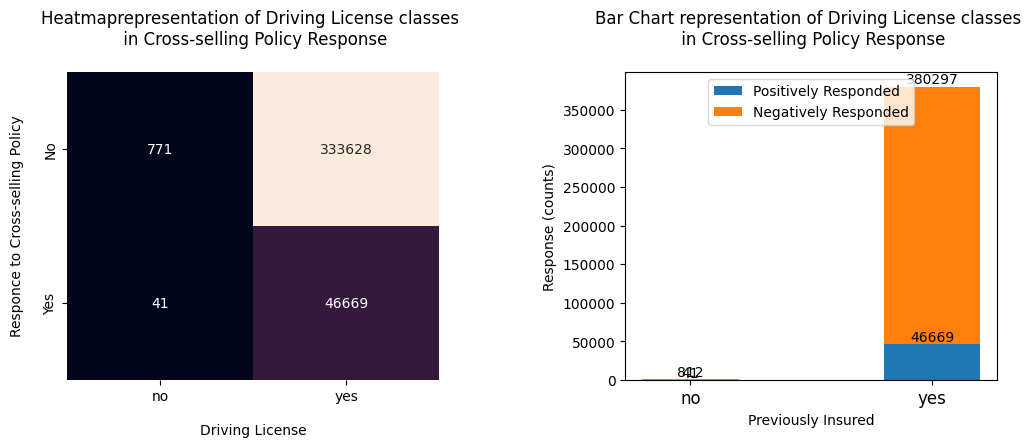

In [215]:
qual_feature_expl(df['Driving_License'])

In [246]:
percent(df['Driving_License'])

Insert the label for the firstly encoded categoryno
The clients that have positively responded among no class of Driving License are 41,(5.05%).
Insert the label for the secondly encoded categoryyes
The clients that have positively responded among the yes class of Driving License are 46669, (12.27%).


Insert the label for the firstly encoded categoryno
Insert the label for the secondly encoded categoryyes


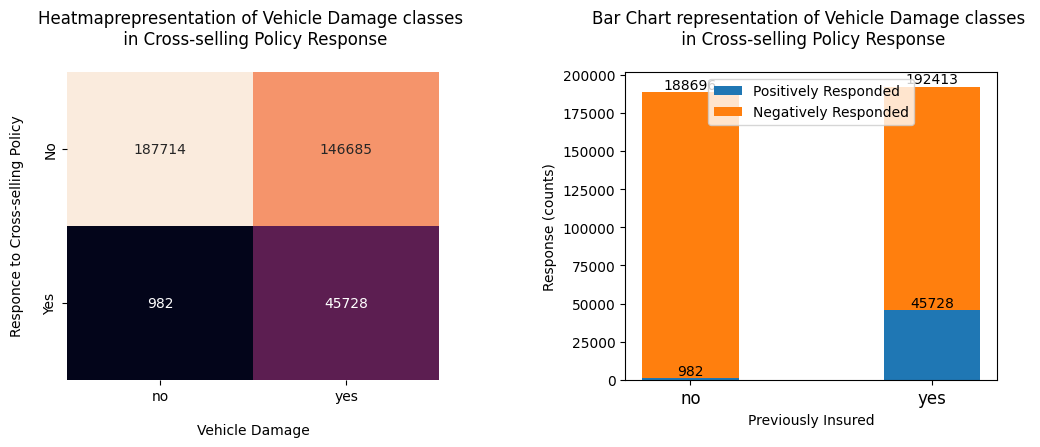

In [218]:
qual_feature_expl(df['Vehicle_Damage'])

ValueError: The number of FixedLocator locations (27), usually from a call to set_ticks, does not match the number of labels (53).

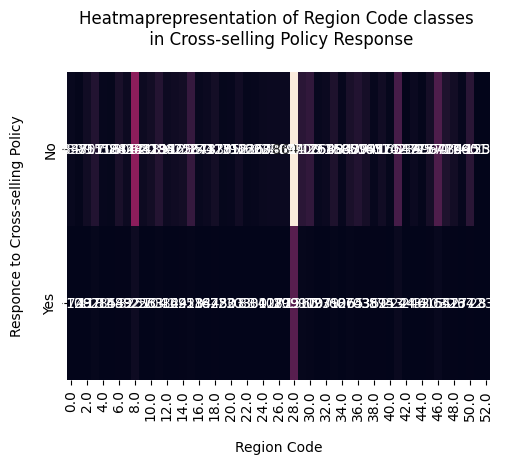

In [238]:
qual_feature_expl(df['Region_Code'])

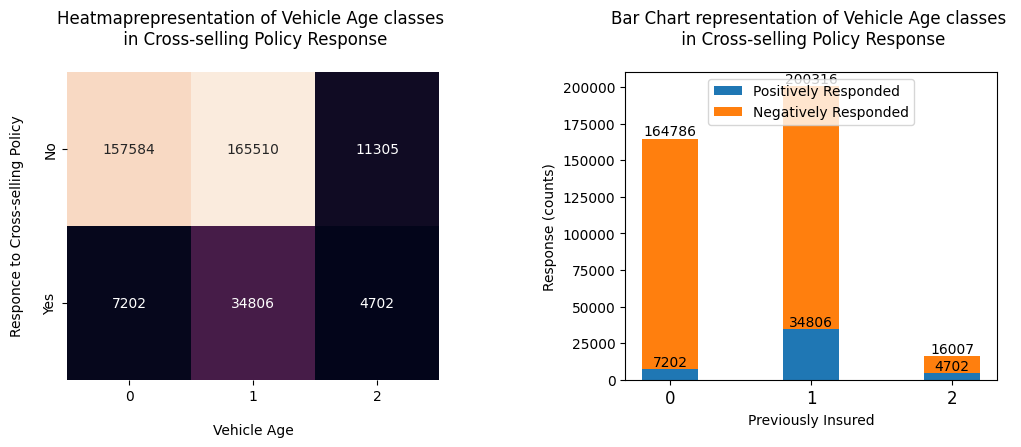

In [236]:
qual_feature_expl(df['Vehicle_Age'])

In [250]:
percent(df['Vehicle_Age'])

The clients that have positively responded among 0 class of Vehicle Age are 7202,(4.37%).
The clients that have positively responded among 1 class of Vehicle Age are 34806,(17.38%).
The clients that have positively responded among 2 class of Vehicle Age are 4702,(29.37%).


ValueError: The number of FixedLocator locations (26), usually from a call to set_ticks, does not match the number of labels (155).

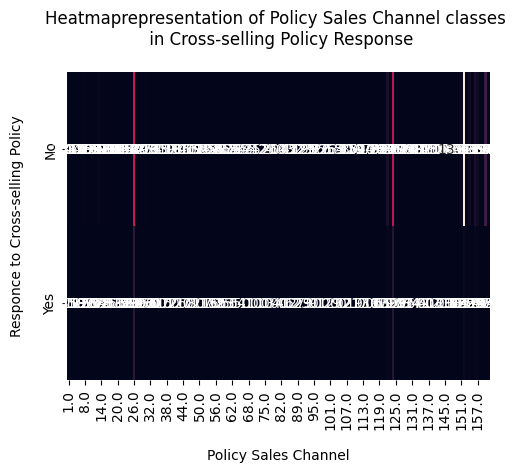

In [239]:
qual_feature_expl(df['Policy_Sales_Channel'])

In [40]:
freq_table = pd.crosstab(df['Response'], df['Previously_Insured'])
freq_table

Previously_Insured,0,1
Response,,
0,159929,174470
1,46552,158


>>>The Frequency table can be turned into a heatmap, otaining an improved visualization:

[Text(0.5, 0, 'No'), Text(1.5, 0, 'Yes')]

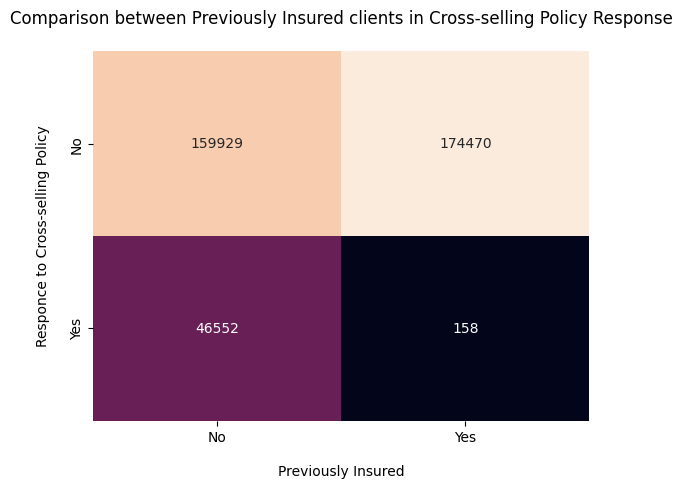

In [41]:
plt.figure()
img = sns.heatmap(freq_table, annot = True, fmt='g',cbar = False)
img.set_title('Comparison between Previously Insured clients in Cross-selling Policy Response', pad = 20)
img.set_xlabel("Previously Insured", labelpad = 14)
img.set_ylabel("Responce to Cross-selling Policy",labelpad = 14)
img.set_yticklabels(['No', 'Yes'])
img.set_xticklabels(['No','Yes'])

In [48]:
print(f"The clients that have positively responded to the Cross-Selling policy offer among the Not Previously Insured are {freq_table[1,0]}, ({(freq_table[1,0]/(freq_table[1,0]+freq_table[0,0]))*100:.2f}%).")
print(f"The clients that have positively responded to the Cross-Selling policy offer among the Previously Insured are {freq_table[1,1]}, ({(freq_table[1,1]/(freq_table[1,1]+freq_table[0,1]))*100:.2f}%).")

The clients that have positively responded to the Cross-Selling policy offer among the Not Previously Insured are 46552, (22.55%).
The clients that have positively responded to the Cross-Selling policy offer among the Previously Insured are 158, (0.09%).


>>>a better visual representation can be obtained with a stacked bar chart.

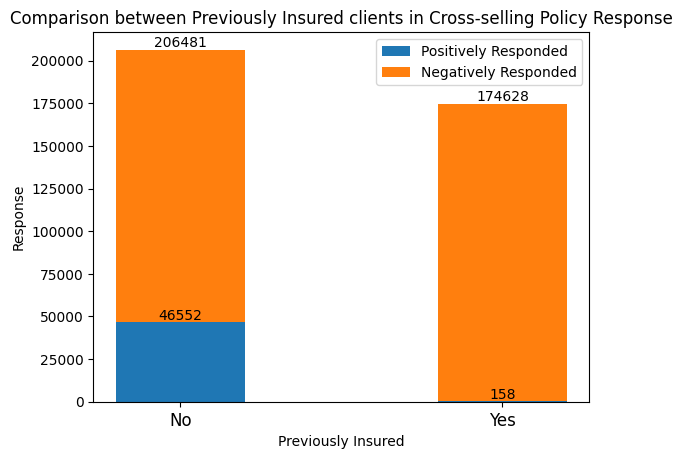

In [43]:
freq_table = freq_table.values
PI = []
for i in df['Previously_Insured'].unique():
  PI.append(str(i))
labels = ["No","Yes"]

weight_counts = {"Yes": freq_table[1,:], "No": freq_table[0,:]}

width = 0.4
bottom = np.zeros(2)

for keys, values in weight_counts.items():
    a = plt.bar(PI, values, width, bottom = bottom) # bottom specifies where the bar drawing should start
    bottom += values

    plt.bar_label(a,label_type='edge')

plt.xticks(PI, labels, fontsize=12)
plt.title("Comparison between Previously Insured clients in Cross-selling Policy Response")
plt.xlabel("Previously Insured")
plt.ylabel("Response (counts)")
plt.legend(["Positively Responded", "Negatively Responded"])
plt.show()

>>>A Chi-squared test can specify whether the distribution of categorical frequencies is the result of an independent sampling or not.

In [44]:
from scipy.stats import chisquare

In [45]:
chisquare(freq_table, axis = 0)

Power_divergenceResult(statistic=array([ 62254.36785467, 173996.57182124]), pvalue=array([0., 0.]))

>>>As unequivocally stated by the test results, there is a clear relationship between the Response to the Cross-selling Policy and the fact that clients already had an existing Insurance. Specifically, only 158 ot of 174470 clients with a previously active insurance positively responded to the cross-selling policy offer (0.09%), against 46552 out of 159929 new entries (22.55%). Thus hinting to the fact that new clents are potentially more likely to enroll directly to the Cross-selling policy vs established clients.

>>>2.8.2. **Response** vs **Vehicle Damage** : being two qualitative nominal variables, the very same approach as above can be adopted.

In [72]:
freq_table_rv = pd.crosstab(df['Response'], df['Vehicle_Damage'])
freq_table_rv

Vehicle_Damage,0,1
Response,,
0,187714,146685
1,982,45728


[Text(0.5, 0, 'No'), Text(1.5, 0, 'Yes')]

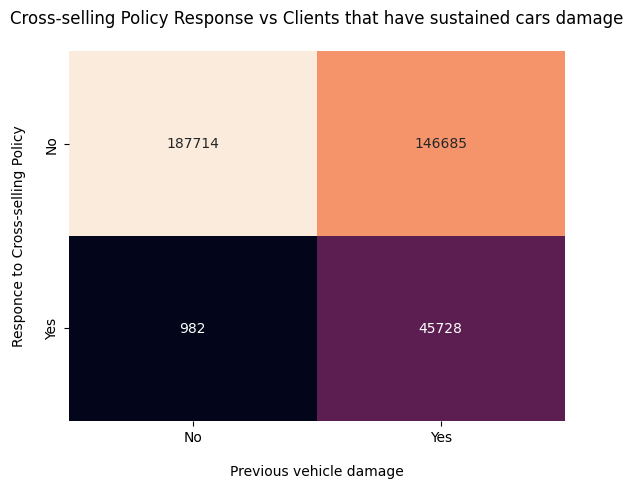

In [69]:
plt.figure()
img = sns.heatmap(freq_table_rv, annot = True, fmt='g',cbar = False)
img.set_title('Cross-selling Policy Response vs Clients that have sustained cars damage', pad = 20)
img.set_xlabel("Previous vehicle damage", labelpad = 14)
img.set_ylabel("Responce to Cross-selling Policy",labelpad = 14)
img.set_yticklabels(['No', 'Yes'])
img.set_xticklabels(['No','Yes'])

In [73]:
freq_table_rv = freq_table_rv.values

In [74]:
print(f"The clients that have positively responded to the Cross-Selling policy offer among the not previosly damaged vehicles {freq_table_rv[1,0]}, ({(freq_table_rv[1,0]/(freq_table_rv[1,0]+freq_table_rv[0,0]))*100:.2f}%).")
print(f"The clients that have positively responded to the Cross-Selling policy offer among the  previosly damaged vehicles {freq_table_rv[1,1]}, ({(freq_table_rv[1,1]/(freq_table_rv[1,1]+freq_table_rv[0,1]))*100:.2f}%).")

The clients that have positively responded to the Cross-Selling policy offer among the not previosly damaged vehicles 982, (0.52%).
The clients that have positively responded to the Cross-Selling policy offer among the  previosly damaged vehicles 45728, (23.77%).


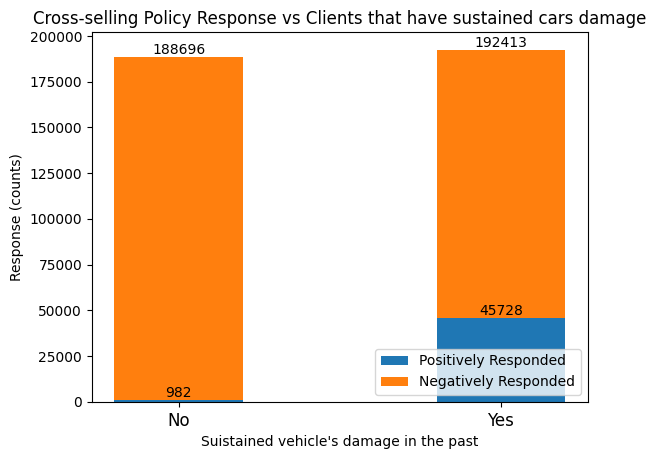

In [79]:
VD = []
for i in df['Vehicle_Damage'].unique():
  VD.append(str(i))
labels = ["No","Yes"]

weight_counts = {"Yes": freq_table_rv[1,:], "No": freq_table_rv[0,:]}

width = 0.4
bottom = np.zeros(2)

for keys, values in weight_counts.items():
    b = plt.bar(VD, values, width, bottom = bottom) # bottom specifies where the bar drawing should start
    bottom += values

    plt.bar_label(b,label_type='edge')

plt.xticks(VD, labels, fontsize=12)
plt.title("Cross-selling Policy Response vs Clients that have sustained cars damage")
plt.xlabel("Suistained vehicle's damage in the past")
plt.ylabel("Response (counts)")
plt.legend(["Positively Responded", "Negatively Responded"]) # legends need to be moved
plt.show()